In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from onehot import OneHotEncoder
from mlp import MLP

In [2]:
df = load_digits()
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
df.data[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

In [4]:
df.images[100]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

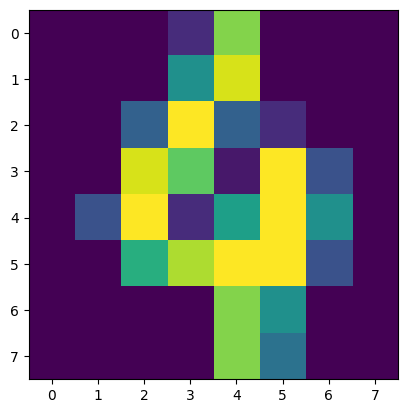

In [5]:
plt.imshow(df.images[100])

In [6]:
df.target[100]

np.int64(4)

In [7]:
X = df.data
Y = df.target

In [8]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

Epoch 1/50 - Loss: 0.3487 - Accuracy: 0.0974 - Test Loss: 0.3252 - Test Accuracy: 0.1889
Epoch 2/50 - Loss: 0.3225 - Accuracy: 0.2060 - Test Loss: 0.3784 - Test Accuracy: 0.0889
Epoch 3/50 - Loss: 0.3776 - Accuracy: 0.0946 - Test Loss: 0.3262 - Test Accuracy: 0.1583
Epoch 4/50 - Loss: 0.3199 - Accuracy: 0.1858 - Test Loss: 0.3229 - Test Accuracy: 0.2972
Epoch 5/50 - Loss: 0.3331 - Accuracy: 0.2463 - Test Loss: 0.3445 - Test Accuracy: 0.1722
Epoch 6/50 - Loss: 0.3367 - Accuracy: 0.1865 - Test Loss: 0.3437 - Test Accuracy: 0.1472
Epoch 7/50 - Loss: 0.3449 - Accuracy: 0.1566 - Test Loss: 0.3426 - Test Accuracy: 0.1222
Epoch 8/50 - Loss: 0.3411 - Accuracy: 0.1280 - Test Loss: 0.3249 - Test Accuracy: 0.1722
Epoch 9/50 - Loss: 0.3222 - Accuracy: 0.1893 - Test Loss: 0.3447 - Test Accuracy: 0.2222
Epoch 10/50 - Loss: 0.3525 - Accuracy: 0.1886 - Test Loss: 0.3288 - Test Accuracy: 0.2278
Epoch 11/50 - Loss: 0.3293 - Accuracy: 0.2213 - Test Loss: 0.3154 - Test Accuracy: 0.1944
Epoch 12/50 - Loss:

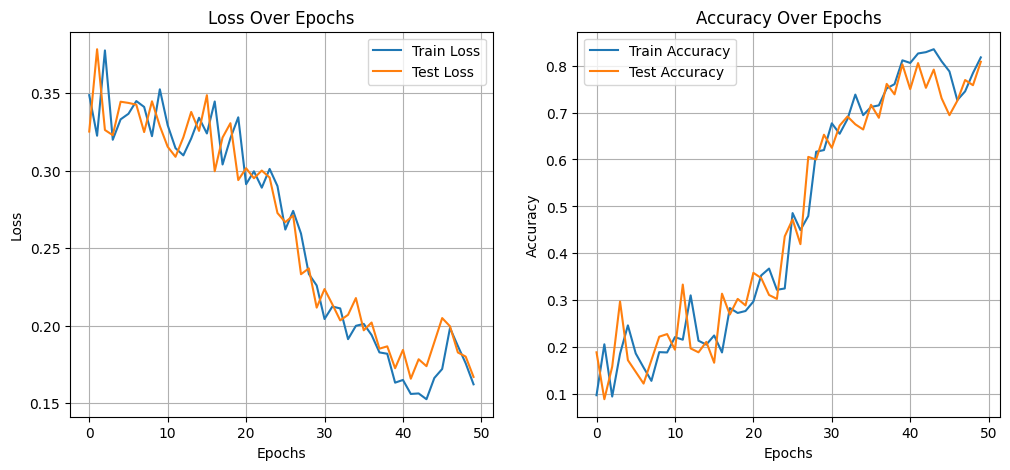

In [10]:
mlp = MLP(input_size=X_train.shape[1], hidden_sizes=[128, 32], output_size=Y_train.shape[1], learning_rate=0.001)
mlp.fit(X_train, Y_train, X_test, Y_test, epochs=50)

In [11]:
test_loss, test_accuracy = mlp.evaluate(X_test, Y_test)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

y_test_inverse = encoder.inverse_transform(Y_test)
sklearn_encoder = SklearnOneHotEncoder()
Y_test_sklearn = sklearn_encoder.fit_transform(Y.reshape(-1, 1))

if np.array_equal(Y_test, Y_test_sklearn):
    print("Custom OneHotEncoder matches Sklearn OneHotEncoder!")
else:
    print("Custom OneHotEncoder does not match Sklearn OneHotEncoder!")

Final Test Loss: 0.1668
Final Test Accuracy: 0.8083
Custom OneHotEncoder does not match Sklearn OneHotEncoder!


In [12]:
import cv2
def predict_handwritten_image(image_path, model):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
    image = cv2.resize(image, (8, 8))  
    image = 16 - (image / 255.0 * 16) 
    image = image.flatten().reshape(1, -1)  
    plt.imshow(image.reshape(8, 8), cmap='gray')
    plt.title("Handwritten Image")
    plt.show()
    
    y_pred = model.forward(image)
    predicted_label = np.argmax(y_pred)
    print(f"Predicted Output Probabilities: {y_pred}")
    print(f"Predicted Label: {predicted_label}")
    return predicted_label

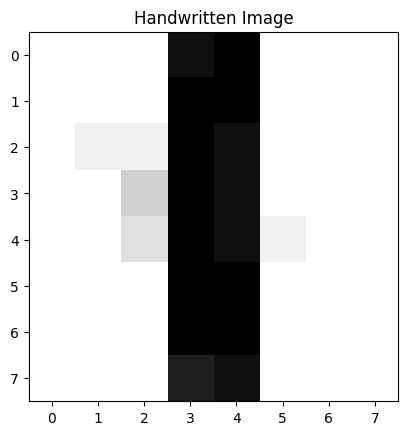

Predicted Output Probabilities: [[5.91315155e-05 6.38088774e-01 3.29018585e-04 6.43971869e-02
  1.61240934e-02 2.26615945e-01 8.74646545e-04 6.59525090e-03
  3.22380620e-02 1.46778914e-02]]
Predicted Label: 1
The model predicts this image as: 1


In [13]:
image_path = "ax-2.jpg"
predicted_label = predict_handwritten_image(image_path, mlp)
print(f"The model predicts this image as: {predicted_label}")